In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random

In [ ]:
# Importing Library for Data Visualization
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
# Importing Tensorflow for model creation and its dependencies
import tensorflow

In [ ]:
# Generate batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# for enabling inline plotting
%matplotlib inline

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
TrainingImagePath='/content/drive/MyDrive/PFE/Detect/Fruits/train'
TestingImagePath='/content/drive/MyDrive/PFE/Detect/Fruits/test'
ValidationImagePath='/content/drive/MyDrive/PFE/Detect/Fruits/valid'

In [72]:
# Defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [73]:
# Defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator(rescale=1./255)

In [74]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 1265 images belonging to 12 classes.


In [75]:
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 165 images belonging to 12 classes.


In [76]:
# Generating the Validation Data
valid_set = test_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 198 images belonging to 12 classes.


In [77]:
# Function to plot any random image from dataset
def showImages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path=os.path.join(TrainingImagePath, class_name)
    try:
        image_path=os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    except:
        image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)

In [78]:
# Printing class labels for each face
test_set.class_indices

{'apple': 0,
 'banana': 1,
 'cherry': 2,
 'grape': 3,
 'kiwi': 4,
 'mango': 5,
 'orange': 6,
 'peach': 7,
 'pear': 8,
 'plum': 9,
 'strawberry': 10,
 'watermelon': 11}

In [79]:
# class_indices have the numeric tag for each class
TrainClasses=training_set.class_indices

In [80]:
def load_images_from_folder(folder,only_path = False, label = ""):
    if only_path == False:
        images = []
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
        return images
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder,filename)
            if img_path is not None:
                path.append([label,img_path])
        return path

In [81]:
images = []
dirp = "/content/drive/MyDrive/PFE/Detect/Dataset /"
images = []
for f in os.listdir(dirp):
    if "jpg" in os.listdir(dirp+f)[0] or "jpeg" in os.listdir(dirp+f)[0]:
        images += load_images_from_folder(dirp+f,True,label = f)
    else:
        continue
        for d in os.listdir(dirp+f):
            images += load_images_from_folder(dirp+f+"/"+d,True,label = f)

df = pd.DataFrame(images, columns = ["fruit", "path"])

from sklearn.utils import shuffle
df = shuffle(df, random_state = 0)
df = df.reset_index(drop=True)

fruit_names = sorted(df.fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
df["label"] = df["fruit"].map(mapper_fruit_names)
print(mapper_fruit_names)

df

{'apple': 0, 'banana': 1, 'cherry': 2, 'grape': 3, 'kiwi': 4, 'mango': 5, 'orange': 6, 'peach': 7, 'pear': 8, 'plum': 9, 'strawberry': 10, 'watermelon': 11}


,fruit,path,label
0,grape,/content/drive/MyDrive/PFE/Detect/Dataset /gra...,3
1,pear,/content/drive/MyDrive/PFE/Detect/Dataset /pea...,8
2,pear,/content/drive/MyDrive/PFE/Detect/Dataset /pea...,8
3,peach,/content/drive/MyDrive/PFE/Detect/Dataset /pea...,7
4,kiwi,/content/drive/MyDrive/PFE/Detect/Dataset /kiw...,4
...,...,...,...
1623,strawberry,/content/drive/MyDrive/PFE/Detect/Dataset /str...,10
1624,watermelon,/content/drive/MyDrive/PFE/Detect/Dataset /wat...,11
1625,grape,/content/drive/MyDrive/PFE/Detect/Dataset /gra...,3
1626,pear,/content/drive/MyDrive/PFE/Detect/Dataset /pea...,8


<ipython-input-82-8340d9098db8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = fc.index, y = fc, palette = "crest")


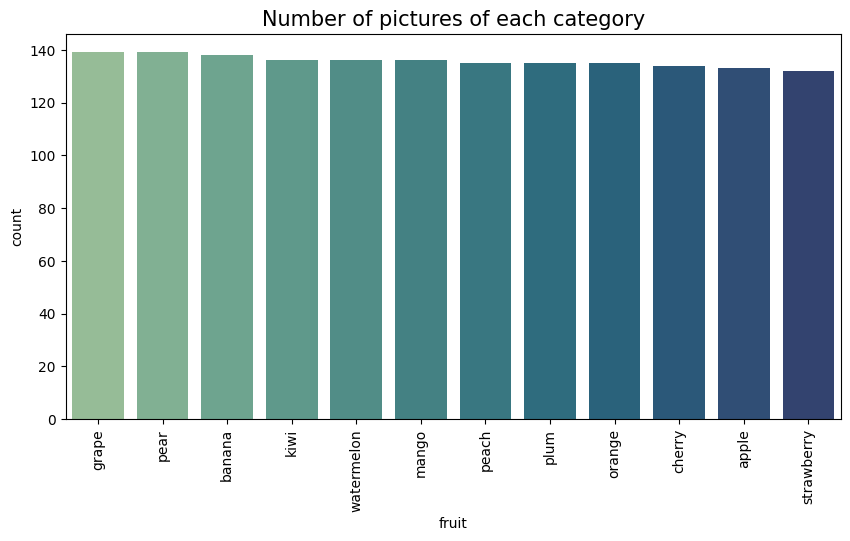

In [82]:
fc = df["fruit"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = fc.index, y = fc, palette = "crest")
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

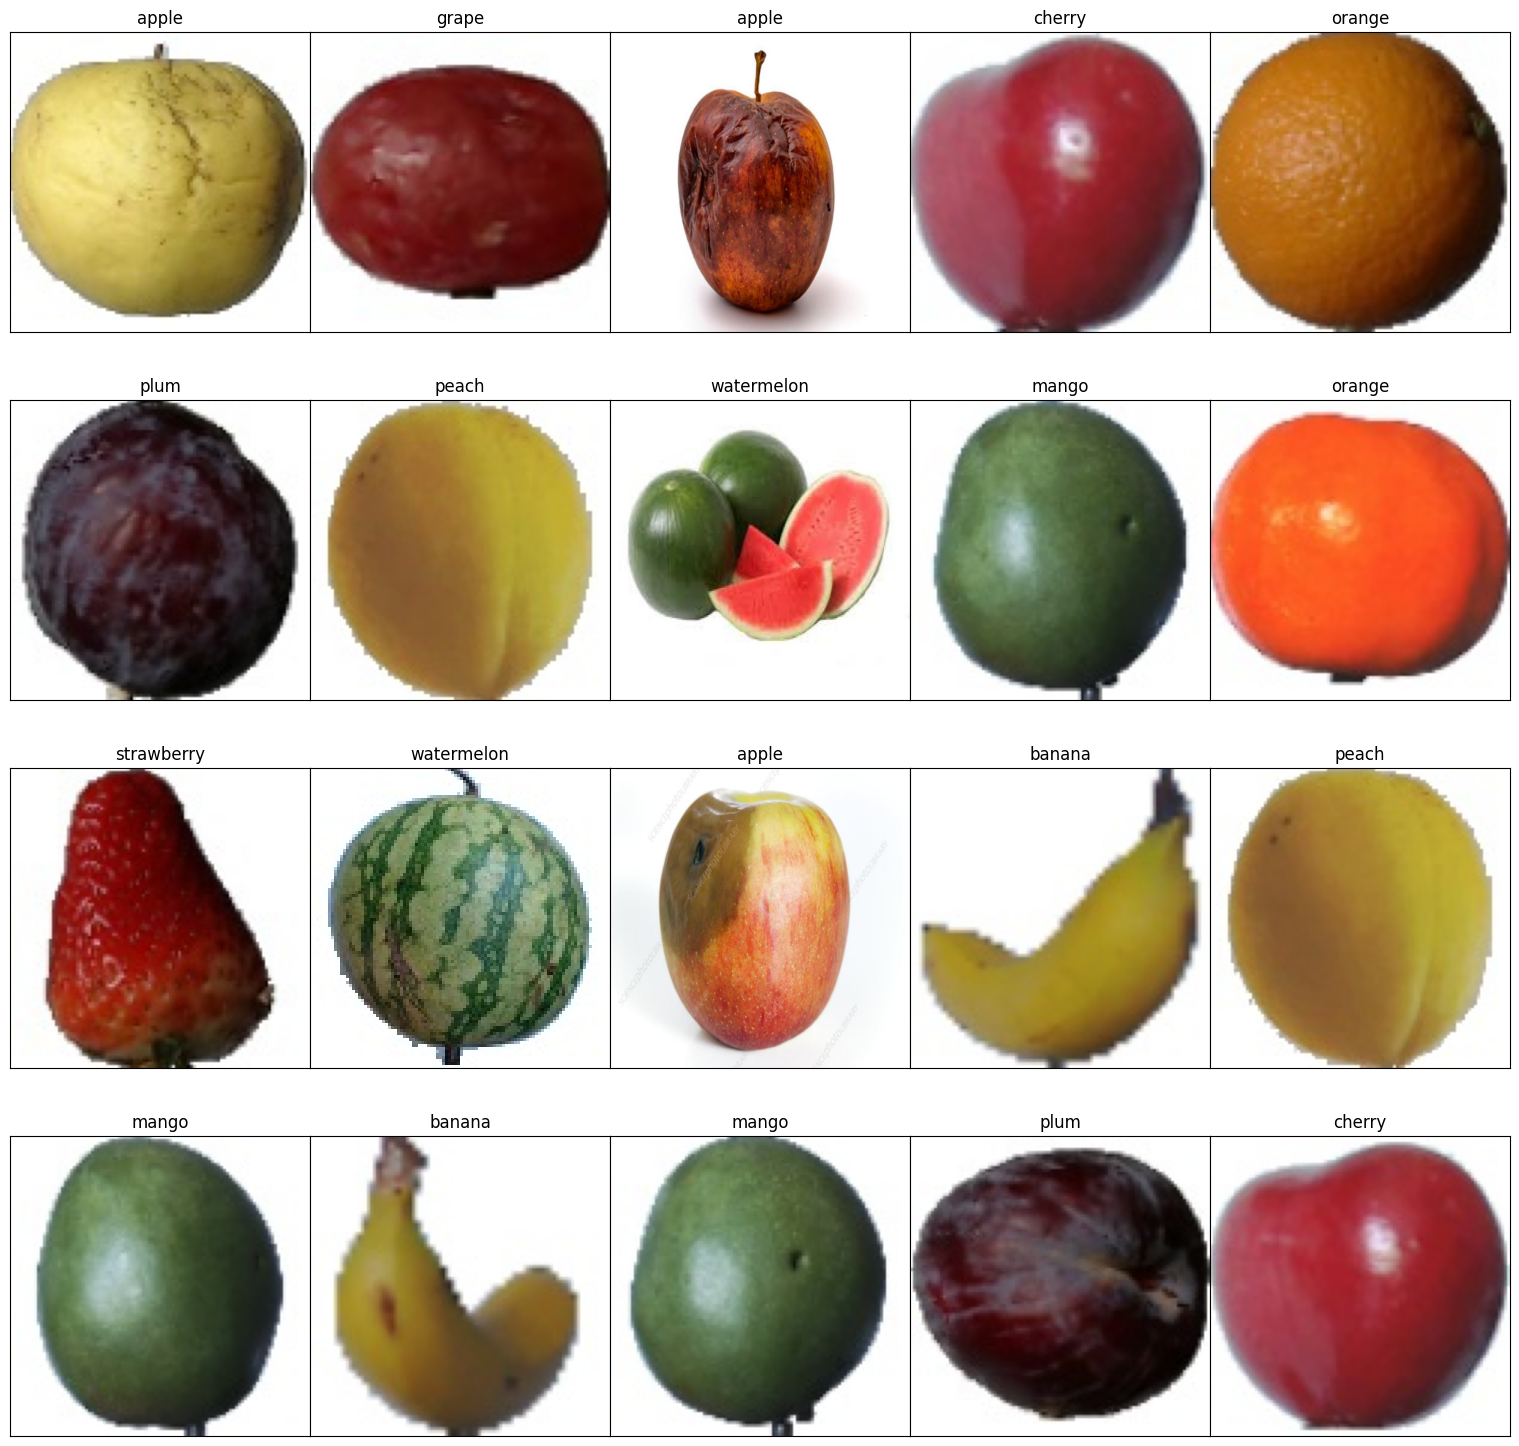

In [83]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.path[i+20]))
    ax.set_title(df.fruit[i+20], fontsize = 12)
plt.tight_layout(pad=0.0)
plt.show()

In [84]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [85]:
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

In [86]:
''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))

'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(len(mapper_fruit_names), activation='softmax'))


In [87]:
'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [88]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [90]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=50,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)

EndTime=time.time()
print("Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

<ipython-input-90-e05c01c453f2>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/50
40/40 [==============================] - 65s 2s/step - loss: 2.7112 - accuracy: 0.4206 - val_loss: 1.4726 - val_accuracy: 0.5152
Epoch 2/50
40/40 [==============================] - 55s 1s/step - loss: 1.0553 - accuracy: 0.6648 - val_loss: 0.6327 - val_accuracy: 0.8030
Epoch 3/50
40/40 [==============================] - 53s 1s/step - loss: 0.6663 - accuracy: 0.7913 - val_loss: 0.4259 - val_accuracy: 0.9040
Epoch 4/50
40/40 [==============================] - 56s 1s/step - loss: 0.4822 - accuracy: 0.8482 - val_loss: 0.4617 - val_accuracy: 0.8687
Epoch 5/50
40/40 [==============================] - 53s 1s/step - loss: 0.3143 - accuracy: 0.9067 - val_loss: 0.2690 - val_accuracy: 0.9242
Epoch 6/50
40/40 [==============================] - 56s 1s/step - loss: 0.2699 - accuracy: 0.9154 - val_loss: 0.2656 - val_accuracy: 0.9192
Epoch 7/50
40/40 [==============================] - 55s 1s/step - loss: 0.2055 - accuracy: 0.9383 - val_loss: 0.3274 - val_accuracy: 0.9192
Epoch 8/50
40/40 [==

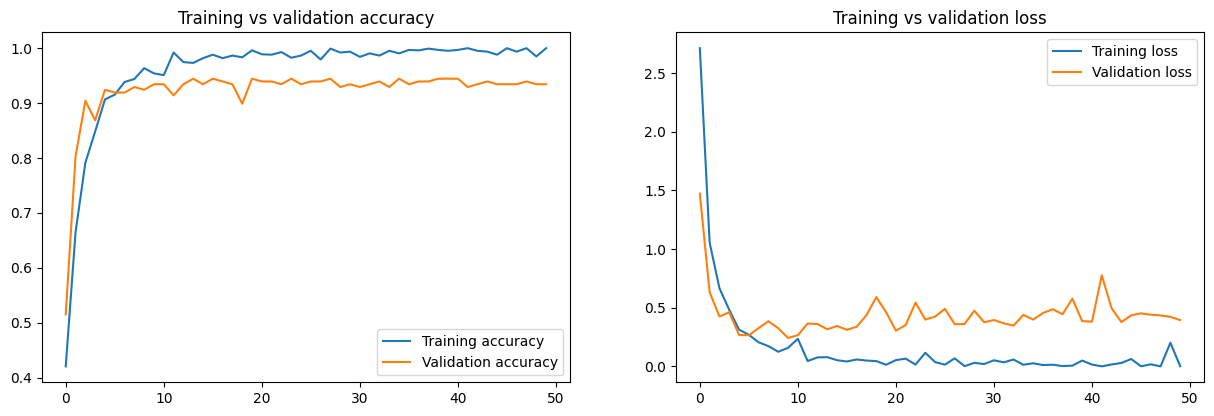

In [91]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [92]:
## Saving the model
classifier.save('/content/drive/MyDrive/PFE/Detect/Detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
